<a href="https://colab.research.google.com/github/Herdvair/Marketing-Channel-Analysis/blob/main/Marketing_Channel_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marketing Channel Analysis

## Data Understanding & Feature Engineering

In [ ]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.options.display.max_columns = 999
pd.options.display.float_format = "{:.2f}".format

In [ ]:
df_store = pd.read_csv('Superstore1.csv', encoding='latin-1')
df_store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [ ]:
def data_understanding(df_store : object) -> object:
    print('\n ===== Shape =====')
    print(df_store.shape)

    print('\n ===== Columns =====')
    print(df_store.columns)

    print('\n ===== Info =====')
    df_store.info()

    print('\n ===== Describe =====')
    print(df_store.describe())

    print('\n ===== Missing Value =====')
    print(df_store.isna().sum())

data_understanding(df_store)


 ===== Shape =====
(9994, 21)

 ===== Columns =====
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

 ===== Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 no

**CEK DATA DUPLIKAT**

In [ ]:
len(df_store.drop_duplicates())/len(df_store)

1.0

**CEK DATA TIDAK KONSISTEN**

In [ ]:
for i in df_store.columns:
  print("========columns=========")
  display(df_store[i].value_counts())
  print("\n")

========columns=========


,count
Row ID,
9994,1
1,1
2,1
3,1
4,1
...,...
15,1
14,1
13,1




========columns=========


,count
Order ID,
CA-2017-100111,14
CA-2017-157987,12
CA-2016-165330,11
US-2016-108504,11
US-2015-126977,10
...,...
CA-2014-110422,1
CA-2016-125794,1
CA-2017-163566,1




========columns=========


,count
Order Date,
9/5/2016,38
9/2/2017,36
11/10/2016,35
12/1/2017,34
12/2/2017,34
...,...
1/28/2016,1
11/9/2016,1
6/3/2016,1




========columns=========


,count
Ship Date,
12/16/2015,35
9/26/2017,34
11/21/2017,32
12/6/2017,32
9/6/2017,30
...,...
2/19/2016,1
2/1/2015,1
8/25/2016,1




========columns=========


,count
Ship Mode,
Standard Class,5968
Second Class,1945
First Class,1538
Same Day,543




========columns=========


,count
Customer ID,
WB-21850,37
MA-17560,34
JL-15835,34
PP-18955,34
CK-12205,32
...,...
AO-10810,1
LD-16855,1
JR-15700,1




========columns=========


,count
Customer Name,
William Brown,37
Matt Abelman,34
John Lee,34
Paul Prost,34
Chloris Kastensmidt,32
...,...
Anthony O'Donnell,1
Lela Donovan,1
Jocasta Rupert,1




========columns=========


,count
Segment,
Consumer,5191
Corporate,3020
Home Office,1783




========columns=========


,count
Country,
United States,9994




========columns=========


,count
City,
New York City,915
Los Angeles,747
Philadelphia,537
San Francisco,510
Seattle,428
...,...
Abilene,1
Montebello,1
Kissimmee,1




========columns=========


,count
State,
California,2001
New York,1128
Texas,985
Pennsylvania,587
Washington,506
Illinois,492
Ohio,469
Florida,383
Michigan,255




========columns=========


,count
Postal Code,
10035,263
10024,230
10009,229
94122,203
10011,193
...,...
61761,1
79605,1
72762,1




========columns=========


,count
Region,
West,3203
East,2848
Central,2323
South,1620




========columns=========


,count
Product ID,
OFF-PA-10001970,19
TEC-AC-10003832,18
FUR-FU-10004270,16
FUR-CH-10002647,15
FUR-CH-10001146,15
...,...
TEC-MA-10004552,1
TEC-MA-10003589,1
OFF-AP-10003099,1




========columns=========


,count
Category,
Office Supplies,6026
Furniture,2121
Technology,1847




========columns=========


,count
Sub-Category,
Binders,1523
Paper,1370
Furnishings,957
Phones,889
Storage,846
Art,796
Accessories,775
Chairs,617
Appliances,466




========columns=========


,count
Product Name,
Staple envelope,48
Staples,46
Easy-staple paper,46
Avery Non-Stick Binders,20
Staples in misc. colors,19
...,...
Xiaomi Mi3,1
"Sanitaire Vibra Groomer IR Commercial Upright Vacuum, Replacement Belts",1
Holmes Harmony HEPA Air Purifier for 17 x 20 Room,1




========columns=========


,count
Sales,
12.96,56
19.44,39
15.55,39
10.37,36
25.92,36
...,...
119.56,1
109.69,1
13.40,1




========columns=========


,count
Quantity,
3,2409
2,2402
5,1230
4,1191
1,899
7,606
6,572
9,258
8,257




========columns=========


,count
Discount,
0.00,4798
0.20,3657
0.70,418
0.80,300
0.30,227
0.40,206
0.60,138
0.10,94
0.50,66




========columns=========


,count
Profit,
0.00,65
6.22,43
9.33,38
3.63,32
5.44,32
...,...
13.30,1
539.25,1
793.72,1


Note : Tidak ada data yang tidak konsisten

In [ ]:
features = ['Sales','Quantity','Discount','Profit']

def check_plot(df_store,features):

    for i in features:

    # tentukan ukuran gambar
        plt.figure(figsize=(20, 4))

        # histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df_store[i], bins=30)
        plt.title('Histogram')

       # box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df_store[i])
        plt.title('Boxplot')

        plt.show()

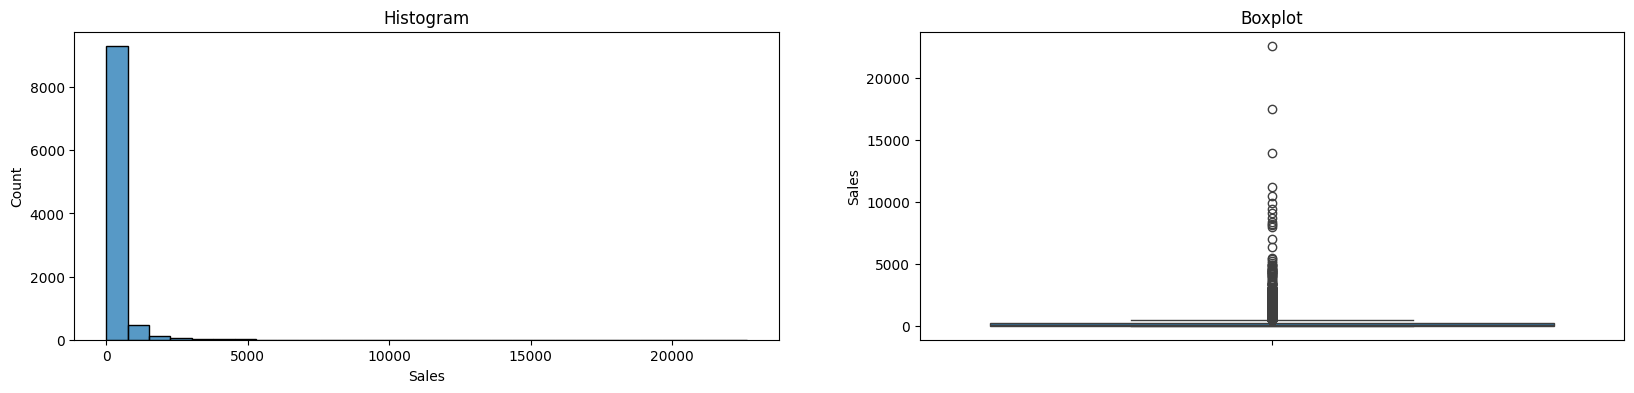

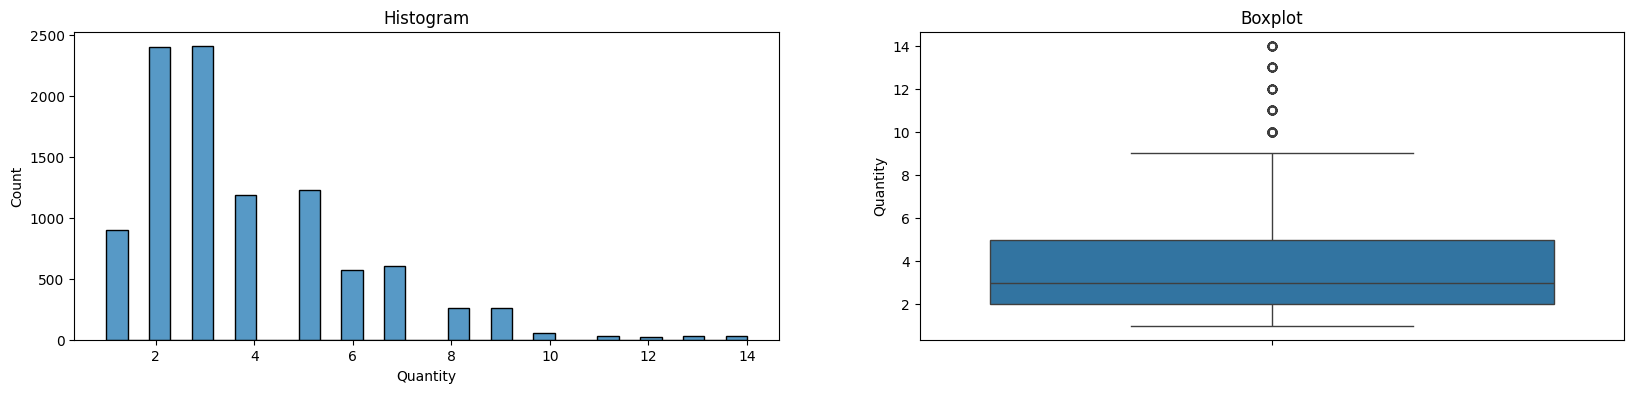

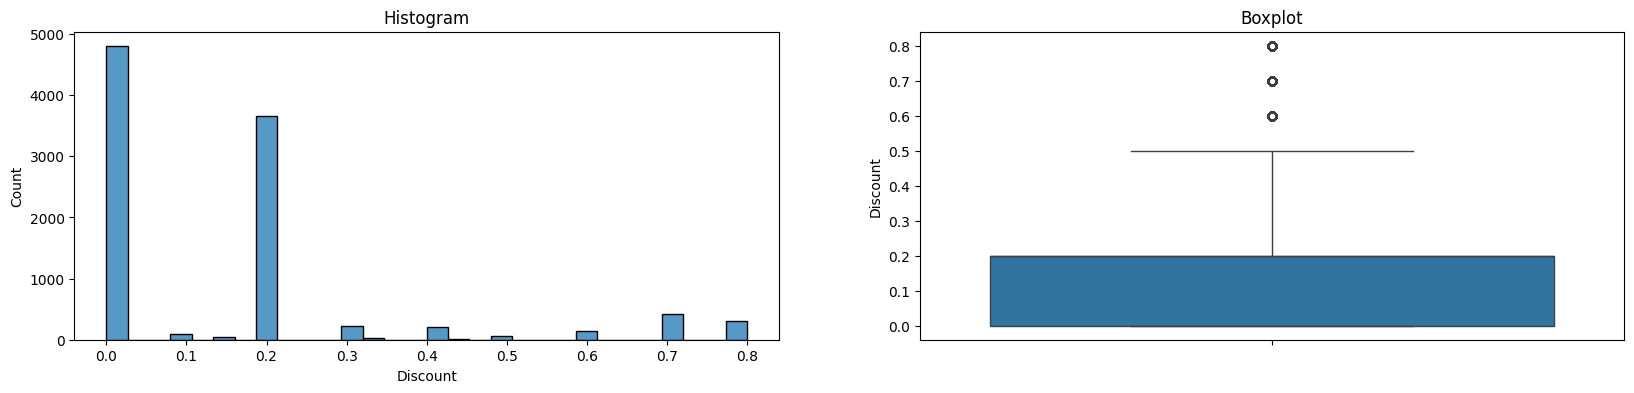

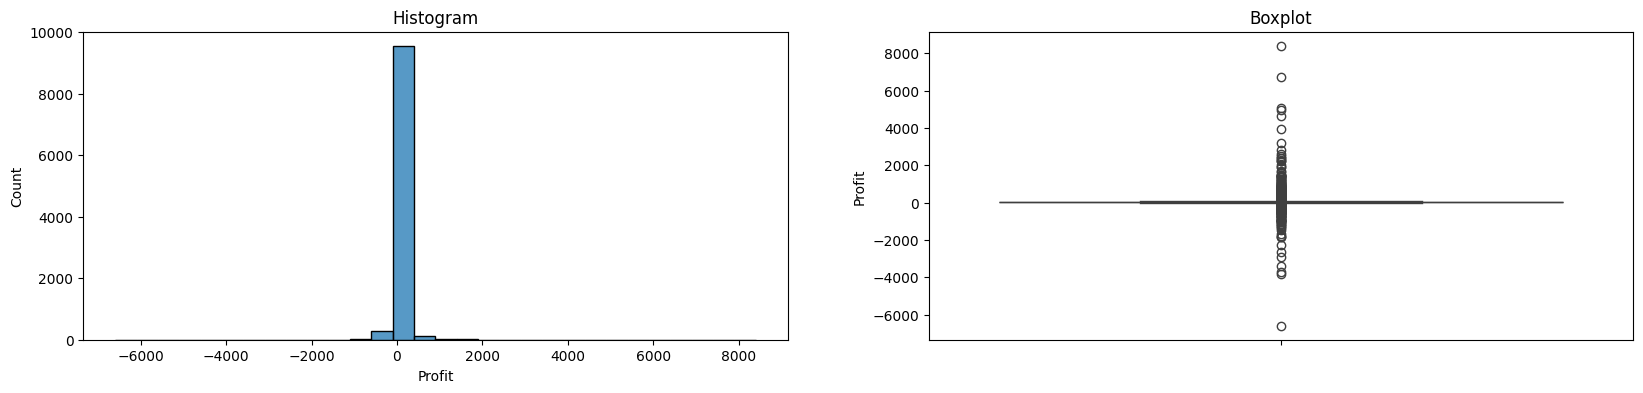

In [ ]:
check_plot(df_store,features)

Note :

Tidak dilakukan handling outlier karena kemungkinan terdapat penjualan harga produk dengan skala besar yang dicerminkan oleh pendapatan yang diperoleh sales, selain itu profit juga dipengaruhi oleh besaran sales, jumlah kuantitas, diskon yang diberikan hingga biaya yang dikeluarkan sehingga nilai profit bisa sangat besar bahkan bisa negatif, tergantung diskon dan biaya yang diperoleh.

## Analisis Profitabilitas dan Jumlah Pelanggan

**Menghitung Profit Tertinggi berdasarkan kota**

In [ ]:
profit_city = df_store.groupby('City')['Profit'].sum().sort_values(ascending=False)
profit_city

,Profit
City,
New York City,62036.98
Los Angeles,30440.76
Seattle,29156.10
San Francisco,17507.39
Detroit,13181.79
...,...
Chicago,-6654.57
Lancaster,-7239.07
San Antonio,-7299.05


**Menghitung Jumlah Customer per Kota**

In [ ]:
customer_city = df_store.groupby('City')['Customer ID'].nunique().sort_values(ascending=False)
customer_city

,Customer ID
City,
New York City,355
Los Angeles,304
Philadelphia,239
San Francisco,232
Seattle,188
...,...
Waterloo,1
Wausau,1
Abilene,1


/tmp/ipython-input-3109724657.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_profit_city.values, y=top_profit_city.index, palette='Blues_r')


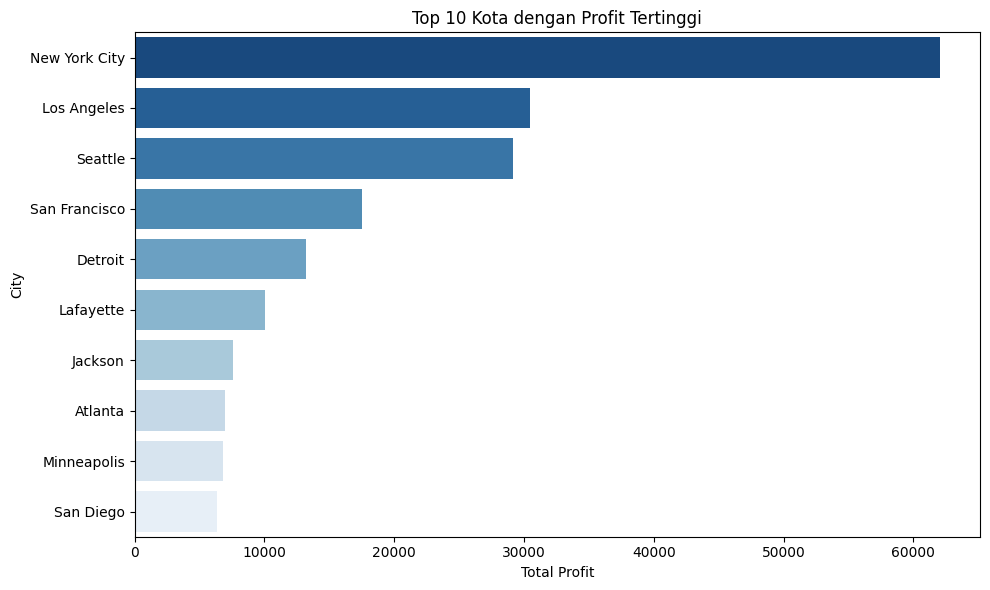

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#profit per kota
top_profit_city = profit_city.head(10)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_profit_city.values, y=top_profit_city.index, palette='Blues_r')

# for container in ax.containers:
#     ax.bar_label(container, fmt='%.0f')

plt.title('Top 10 Kota dengan Profit Tertinggi')
plt.xlabel('Total Profit')
plt.ylabel('City')
plt.tight_layout()
plt.show()

Insight :

Berdasarkan visualisasi, New York City mencatatkan total profit tertinggi dibandingkan kota-kota lainnya. Hal ini menunjukkan bahwa aktivitas penjualan e-commerce paling menguntungkan terjadi di kota ini. Faktor yang berpotensi mendorong tingginya profit di New York City antara lain:

1. Merupakan pusat ekonomi dan gaya hidup di Amerika Serikat.

2. Memiliki kepadatan penduduk tinggi dan daya beli yang kuat.

3. Permintaan produk cenderung lebih tinggi dan beragam, termasuk produk-produk dengan margin profit yang besar.

/tmp/ipython-input-2640272236.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_customer_city.values, y=top_customer_city.index, palette='Greens_r')


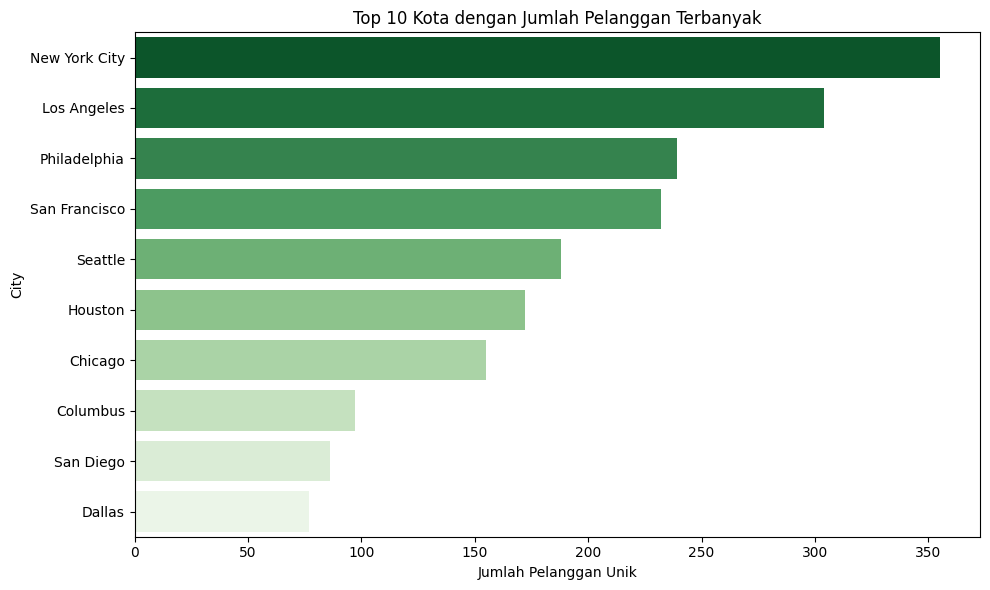

In [ ]:
# pelanggan per kota

top_customer_city = customer_city.head(10)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_customer_city.values, y=top_customer_city.index, palette='Greens_r')

# for container in ax.containers:
#     ax.bar_label(container, fmt='%.0f')

plt.title('Top 10 Kota dengan Jumlah Pelanggan Terbanyak')
plt.xlabel('Jumlah Pelanggan Unik')
plt.ylabel('City')
plt.tight_layout()
plt.show()

Insight :  

Kota New York City menempati peringkat tertinggi dengan jumlah pelanggan terbanyak, diikuti oleh Los Angeles, Philadelphia, dan San Francisco.

New York City dan Los Angeles tidak hanya mendominasi dari sisi profit, namun dari jumlah pelanggan, menunjukkan potensi pasar yang sangat luas Kota seperti Philadelphia dan San Francisco juga menunjukkan daya tarik tinggi dalam menarik pelanggan, menjadikannya target potensial untuk ekspansi produk atau layanan.

## Analisis Perilaku Pembelian Pelanggan

**Jumlah Transaksi Terbanyak berdasarkan Kota**

In [ ]:
city_order = df_store.groupby('City')['Order ID'].count().sort_values(ascending=False)
city_order

,Order ID
City,
New York City,915
Los Angeles,747
Philadelphia,537
San Francisco,510
Seattle,428
...,...
Conroe,1
Bartlett,1
Conway,1


/tmp/ipython-input-2411475957.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_city_order.values, y=top_city_order.index, palette='Reds_r')


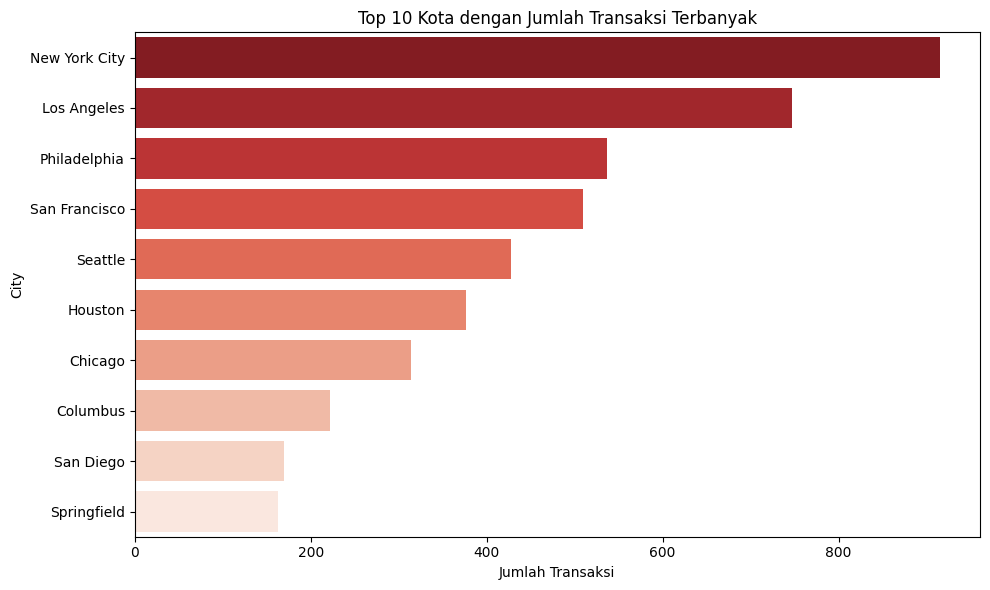

In [ ]:
top_city_order= city_order.head(10)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_city_order.values, y=top_city_order.index, palette='Reds_r')

# for container in ax.containers:
#     ax.bar_label(container, fmt='%.0f')

plt.title('Top 10 Kota dengan Jumlah Transaksi Terbanyak')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('City')
plt.tight_layout()
plt.show()

Insight :

New York City menempati posisi teratas sebagai kota dengan jumlah transaksi tertinggi, diikuti oleh Los Angeles dan Philadelphia. Hal ini menunjukkan bahwa pelanggan di kota New York tidak hanya banyak secara jumlah tetapi juga sangat aktif dalam bertransaksi, yang menjadikannya pasar paling potensial dan menguntungkan bagi e-commerce.

Kota-kota besar lainnya seperti San Fransisco, Seattle, dan Houston juga memiliki frekuensi transaksi yang tinggi, menunjukkan bahwa mereka adalah pasar aktif yang layak difokuskan dalam strategi penjualan atau pemasaran.

**Jenis Produk Terlaris**

In [ ]:
product_laris = df_store.groupby('Category')['Order ID'].count().sort_values(ascending=False)
product_laris

,Order ID
Category,
Office Supplies,6026
Furniture,2121
Technology,1847


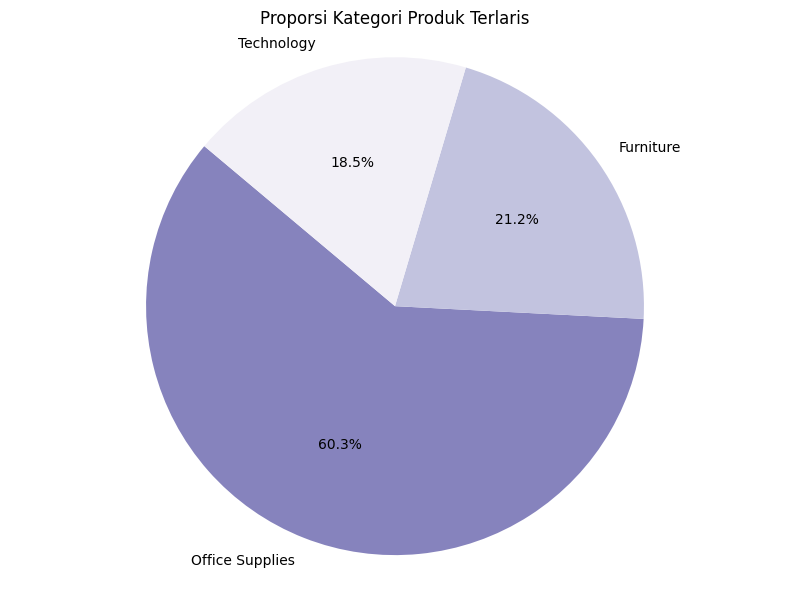

In [ ]:
top_product_laris = product_laris.head()

colors = plt.cm.Purples_r(py.linspace(0.4, 0.9, len(top_product_laris)))

# Buat Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(
    top_product_laris.values,
    labels=top_product_laris.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

plt.title('Proporsi Kategori Produk Terlaris')
plt.axis('equal')
plt.tight_layout()
plt.show()

Insight :    

Produk Office Supplies mendominasi penjualan dengan proporsi sekitar 60,3%, jauh di atas Furniture (21,2%) dan Technology (18,5%). Hal ini menunjukkan bahwa kebutuhan terhadap alat tulis kantor dan perlengkapan pendukung operasional bisnis sangat tinggi kemungkinan besar karena segmen pelanggan banyak berasal dari perusahaan, kantor kecil, atau usaha mikro yang membutuhkan pasokan rutin. Disisi lain yaitu Furniture dan Technology cenderung memiliki frekuensi pembelian yang lebih rendah, kemungkinan karena termasuk barang bernilai tinggi.

In [ ]:
#berdasarkan jumlah unit terbanyak yang terjual
produk_unit_terlaris = df_store.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
produk_unit_terlaris

,Quantity
Category,
Office Supplies,22906
Furniture,8028
Technology,6939


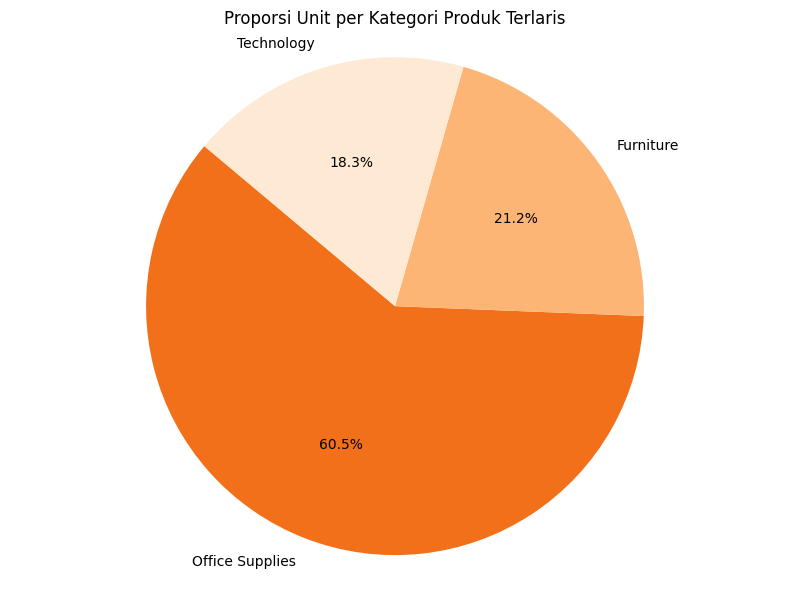

In [ ]:
top_unit_product_laris = produk_unit_terlaris.head()

colors1 = plt.cm.Oranges_r(py.linspace(0.4, 0.9, len(top_unit_product_laris)))

# Buat Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(
    top_unit_product_laris.values,
    labels=top_unit_product_laris.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors1
)

plt.title('Proporsi Unit per Kategori Produk Terlaris')
plt.axis('equal')
plt.tight_layout()
plt.show()

Insight :

Kategori Office Supplies mendominasi sekitar 60,5% dari total unit produk terjual, menunjukkan bahwa kategori ini paling sering dibeli oleh pelanggan.Disisi lain Furniture (21,2%) dan Technology (18,3%), yang relatif jauh lebih rendah dari Office Supplies.

Proporsi ini menunjukkan bahwa permintaan terhadap produk Office Supplies sangat tinggi, kemungkinan karena Produk tersebut bersifat kebutuhan harian harga satuannya relatif lebih rendah,serta dibutuhkan dalam jumlah banyak oleh kantor, institusi hingga usaha mikro

**Jenis Pengiriman Sering Digunakan**

In [ ]:
pengiriman_sering = df_store['Ship Mode'].value_counts()
pengiriman_sering

,count
Ship Mode,
Standard Class,5968
Second Class,1945
First Class,1538
Same Day,543


/tmp/ipython-input-577296662.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_ship_laris.values, y=top_ship_laris.index, palette='flare_r')


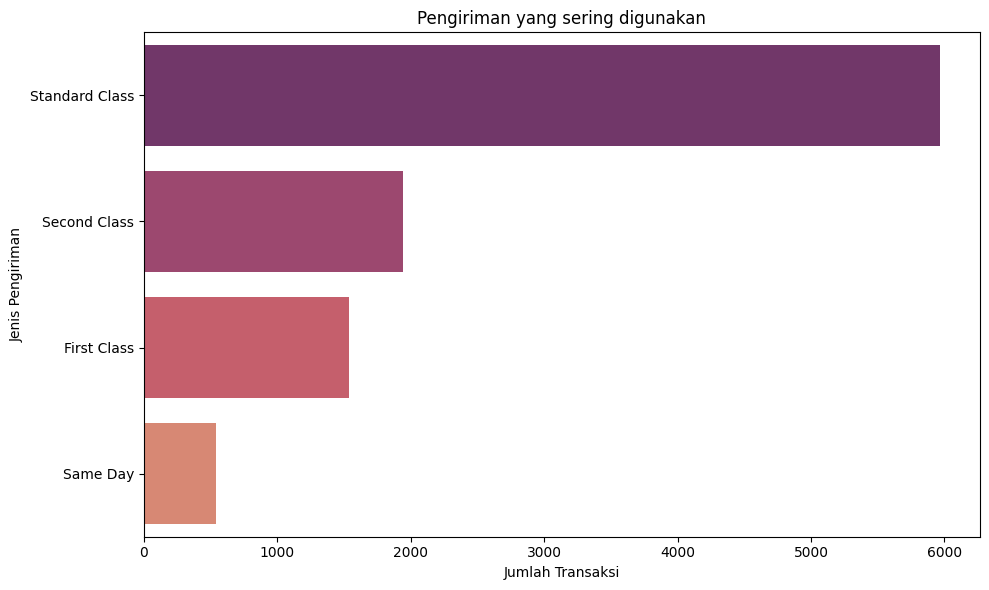

In [ ]:
top_ship_laris= pengiriman_sering.head(10)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_ship_laris.values, y=top_ship_laris.index, palette='flare_r')

# for container in ax.containers:
#     ax.bar_label(container, fmt='%.0f')

plt.title('Pengiriman yang sering digunakan')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Jenis Pengiriman')
plt.tight_layout()
plt.show()

Insight :

Standard Class merupakan jenis pengiriman yang paling banyak digunakan oleh pelanggan dibanding jenis pengiriman lainnya seperti Second Class, First Class, dan Same Day. Hal ini menunjukkan bahwa pelanggan lebih memilih pengiriman ekonomis yang harga ongkirnya masih dapat dijangkau. Di sisi lain, Jenis Same Day paling jarang digunakan, menandakan bahwa urgensi pengiriman bukan prioritas utama dalam mayoritas transaksi atau bisa jadi harga ongkirnya lebih mahal dibandingankan Standar Class.

In [ ]:
#export_csv
df_store.to_csv('df_store.csv', index=False)

## RFM

In [ ]:
df_store['Order Date'] = pd.to_datetime(df_store['Order Date'])
df_store['Ship Date'] = pd.to_datetime(df_store['Ship Date'])

In [ ]:
snapshot_date = df_store['Order Date'].max() + pd.Timedelta(days=365)

In [ ]:
rfm = df_store.groupby('Customer ID').agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days,
    'Order ID': 'nunique',
    'Sales': 'sum'
}).reset_index()

rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']


In [ ]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], q=3, labels=[3, 2, 1]).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=3, labels=[1, 2, 3]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=3, labels=[1, 2, 3]).astype(int)

In [ ]:
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)


In [ ]:
def segment_map(rfm_score):
    if rfm_score == '333':
        return 'Champions'
    elif rfm_score in ['332', '323', '233', '331']:
        return 'Loyal Customers'
    elif rfm_score in ['322', '321', '313', '312']:
        return 'Potential Loyalist'
    elif rfm_score in ['311', '221']:
        return 'New Customers'
    elif rfm_score in ['222', '232', '223', '231']:
        return 'Promising'
    elif rfm_score in ['213', '212', '123']:
        return 'Need Attention'
    elif rfm_score in ['132', '133', '122']:
        return 'Hibernating'
    elif rfm_score in ['113', '112', '111']:
        return 'At Risk'
    else:
        return 'Others'


In [ ]:
rfm['Segment'] = rfm['RFM_Segment'].apply(segment_map)
segment_counts = rfm['RFM_Segment'].value_counts()
segment_percentage = rfm['RFM_Segment'].value_counts(normalize=True) * 100
distribusi = pd.DataFrame({
    'Jumlah': segment_counts,
    'Persentase (%)': segment_percentage.round(2)
})

/tmp/ipython-input-4125457278.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='Set2')


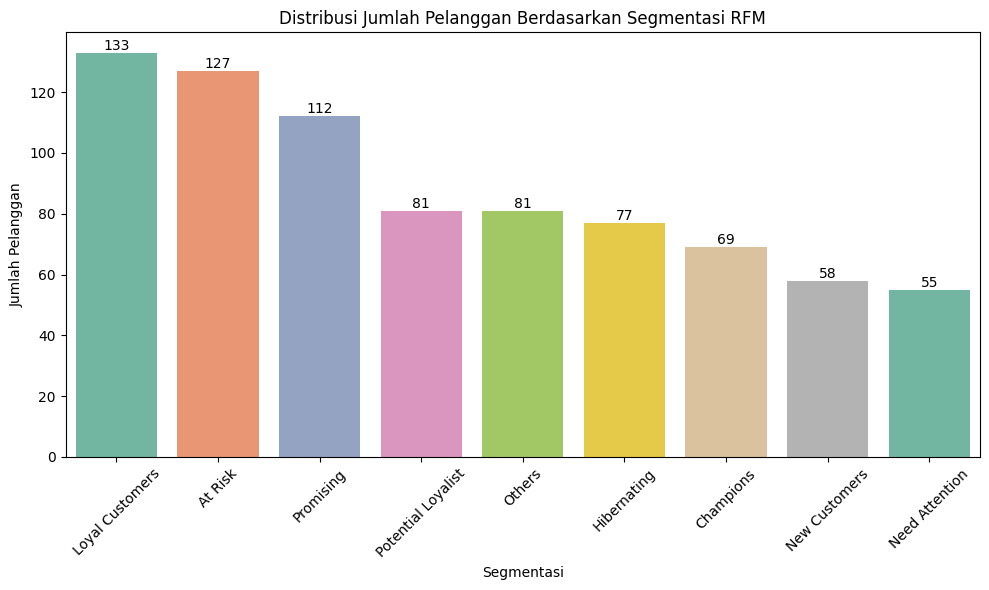

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='Set2')

# Add labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

# Styling plot
plt.title('Distribusi Jumlah Pelanggan Berdasarkan Segmentasi RFM')
plt.xlabel('Segmentasi')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insight :

- Loyal Customers adalah segmen terbanyak, menunjukkan bahwa banyak pelanggan setia yang rutin dalam bertransaksi
- At Risk sebagai urutan kerdua terbanyak, menunjukkan bahwa pelanggan sebelumnya aktif, namun tidak bertransaksi lagi
- Promising dan Potential Loyalist berpotensi ditingkatkan menjadi pelanggan tetap
- Champion belum dominan, artinya belum banyak pelanggan yang terbaik
- Hibernating masih cukup banyak sehingga memerlukan strategi agar mereka bertransaksi lagi
- New Customer dan Need Attention masih sedikit, kemungkinan mereka belum loyal atau hanya sekedar sekali atau beberapa kali transaksi.

In [ ]:
df_store.to_csv('df_store RFM.csv', index=False)